In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data into pandas dataframe
df = pd.read_csv('All Data.csv')

In [3]:
# remove columns that are not needed for analysis
df1 = df[['Women', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino',
       '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+','Pay1', 'Lognumjobs', 'Growthrate',
       'No formal educational credential', 'Some college, no degree']]

df99 = df[['Women', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino']]

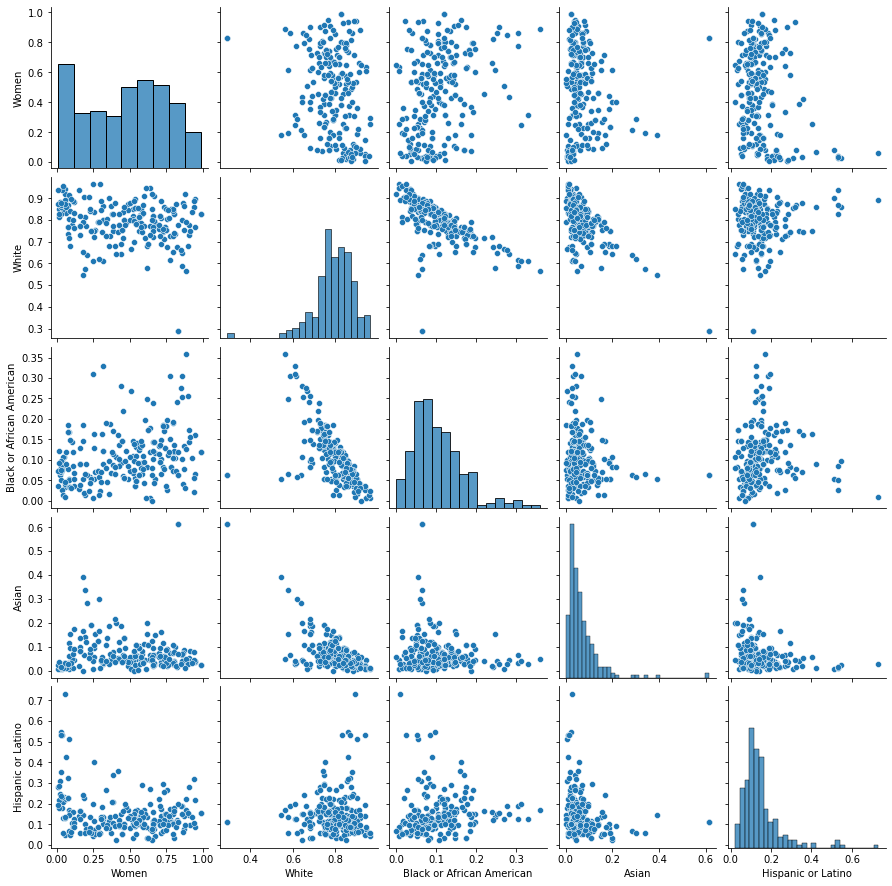

In [4]:
#pairplot with seaborn for all the demographic groups including pay, growth rate, and education
sns.pairplot(df99)
plt.show()

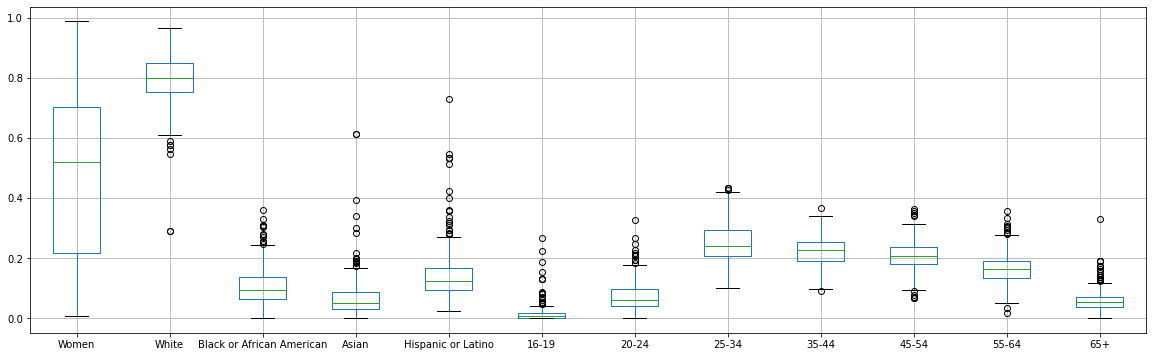

In [5]:
# create a new dataframe for the boxplot
df2 = df[['Women', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino',
       '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']]
# set the size of the chart to make space for all the plots
plt.figure(figsize=(20,6))
# draw boxplot for all the columns in dataframe
df2.boxplot()
plt.show()

In [6]:
# built-in correlation table
df99.corr()

,Women,White,Black or African American,Asian,Hispanic or Latino
Women,1.000000,-0.229372,0.297361,0.022492,-0.275527
White,-0.229372,1.000000,-0.593332,-0.674890,0.085093
Black or African American,0.297361,-0.593332,1.000000,-0.163498,0.074001
Asian,0.022492,-0.674890,-0.163498,1.000000,-0.246833
Hispanic or Latino,-0.275527,0.085093,0.074001,-0.246833,1.000000


In [7]:
df100 = df[['Women', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino', 
            '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']]

df100.max(axis=0)-df100.min(axis=0)

Women                        0.980000
White                        0.675224
Black or African American    0.358865
Asian                        0.613937
Hispanic or Latino           0.709000
16-19                        0.267241
20-24                        0.325648
25-34                        0.335602
35-44                        0.276099
45-54                        0.296970
55-64                        0.339286
65+                          0.328524
dtype: float64

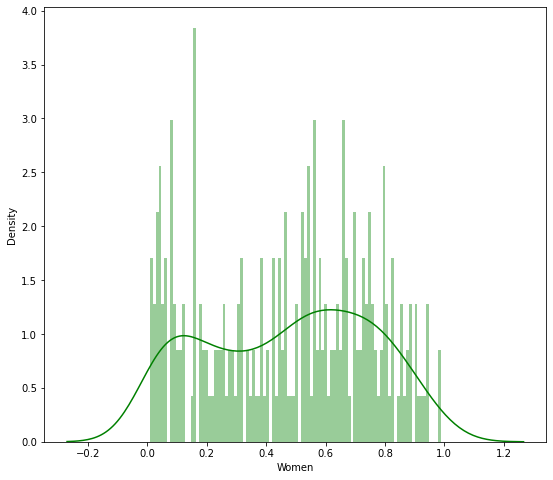

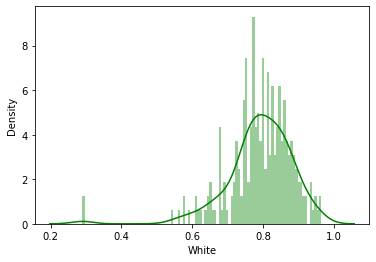

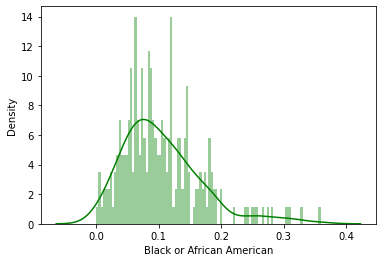

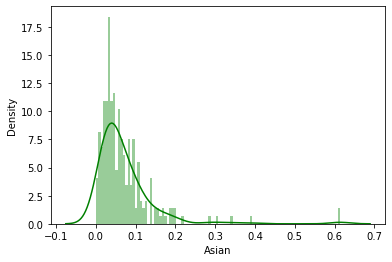

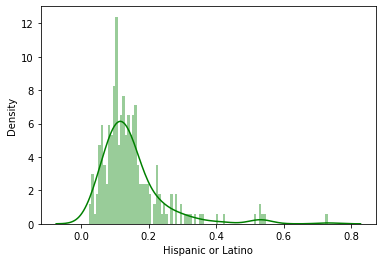

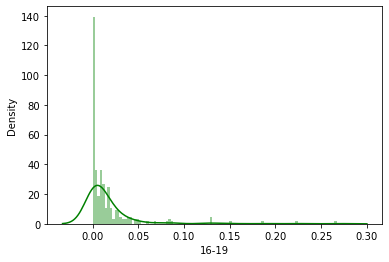

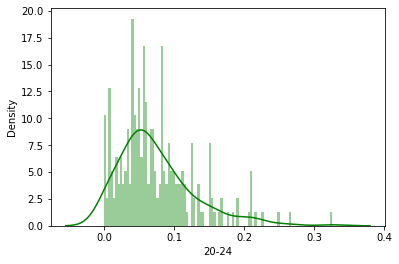

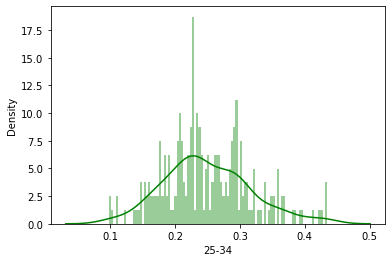

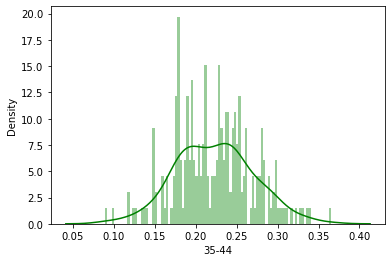

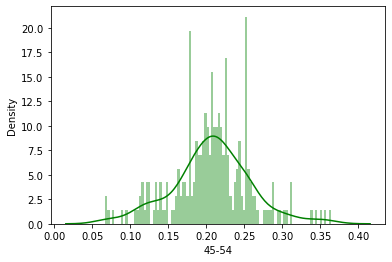

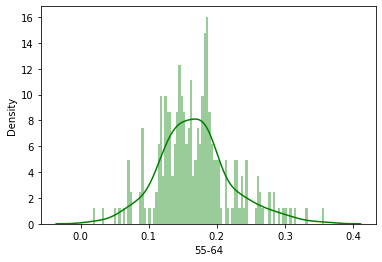

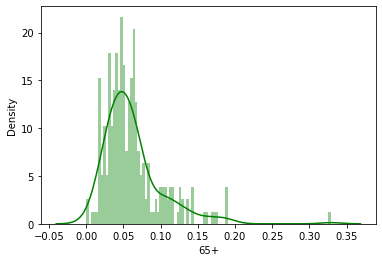

In [8]:
# create distribution plots for all the demographic groups
plt.figure(figsize=(9, 8))
for col in df2.columns:
        sns.distplot(df2[col], color='g', bins=100, hist_kws={'alpha': 0.4})
        plt.show()

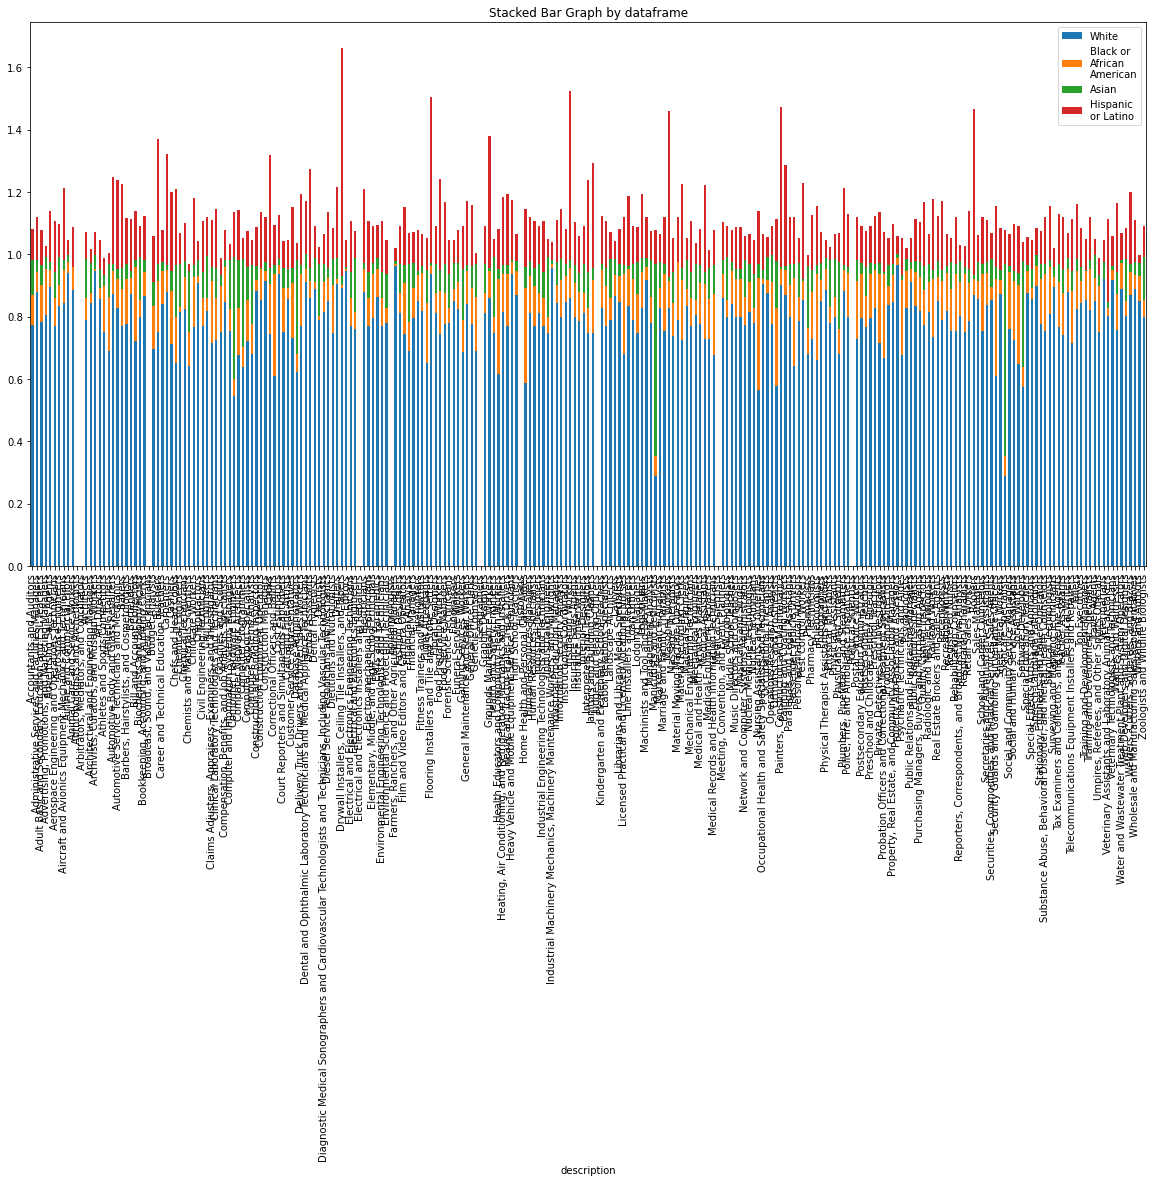

In [9]:
# STacked Bar charts for the race dataset  for all the jobs
df_ooh = pd.read_csv('target_data.csv')
df3 = df_ooh[['description', 'White', 'Black or\nAfrican\nAmerican', 'Asian', 'Hispanic\nor Latino']]#,
       #'Women','16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']]

plt.rcParams["figure.figsize"] = (20, 10)
df3.plot(x='description', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
plt.show()

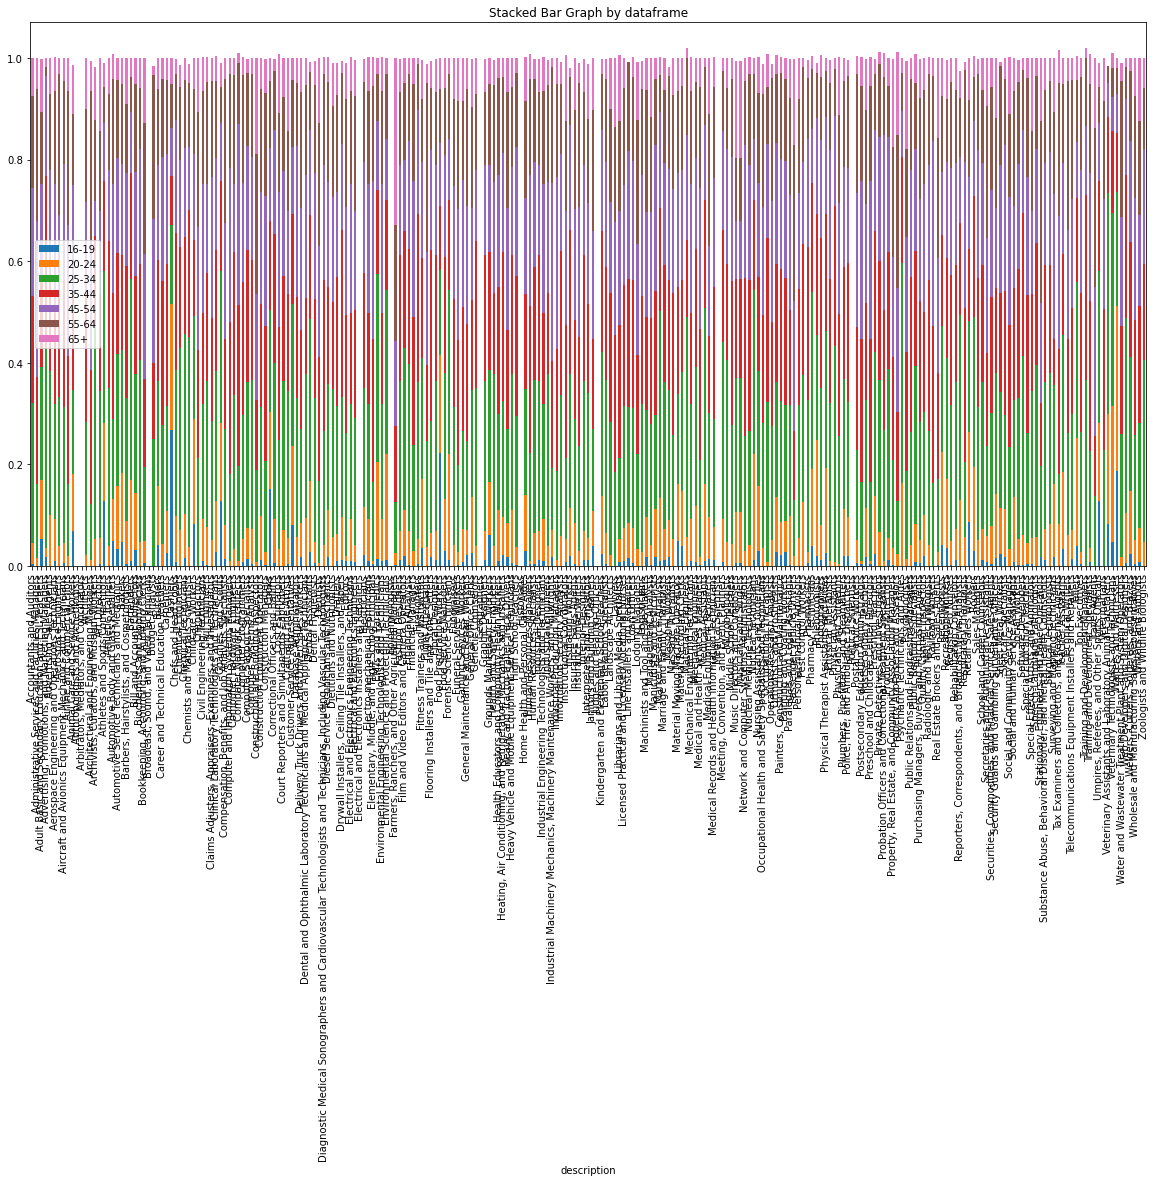

In [10]:
# stacked bar chart for age distribution for all the jobs
df3 = df_ooh[['description', '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']]

plt.rcParams["figure.figsize"] = (20, 10)
df3.plot(x='description', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
plt.show()

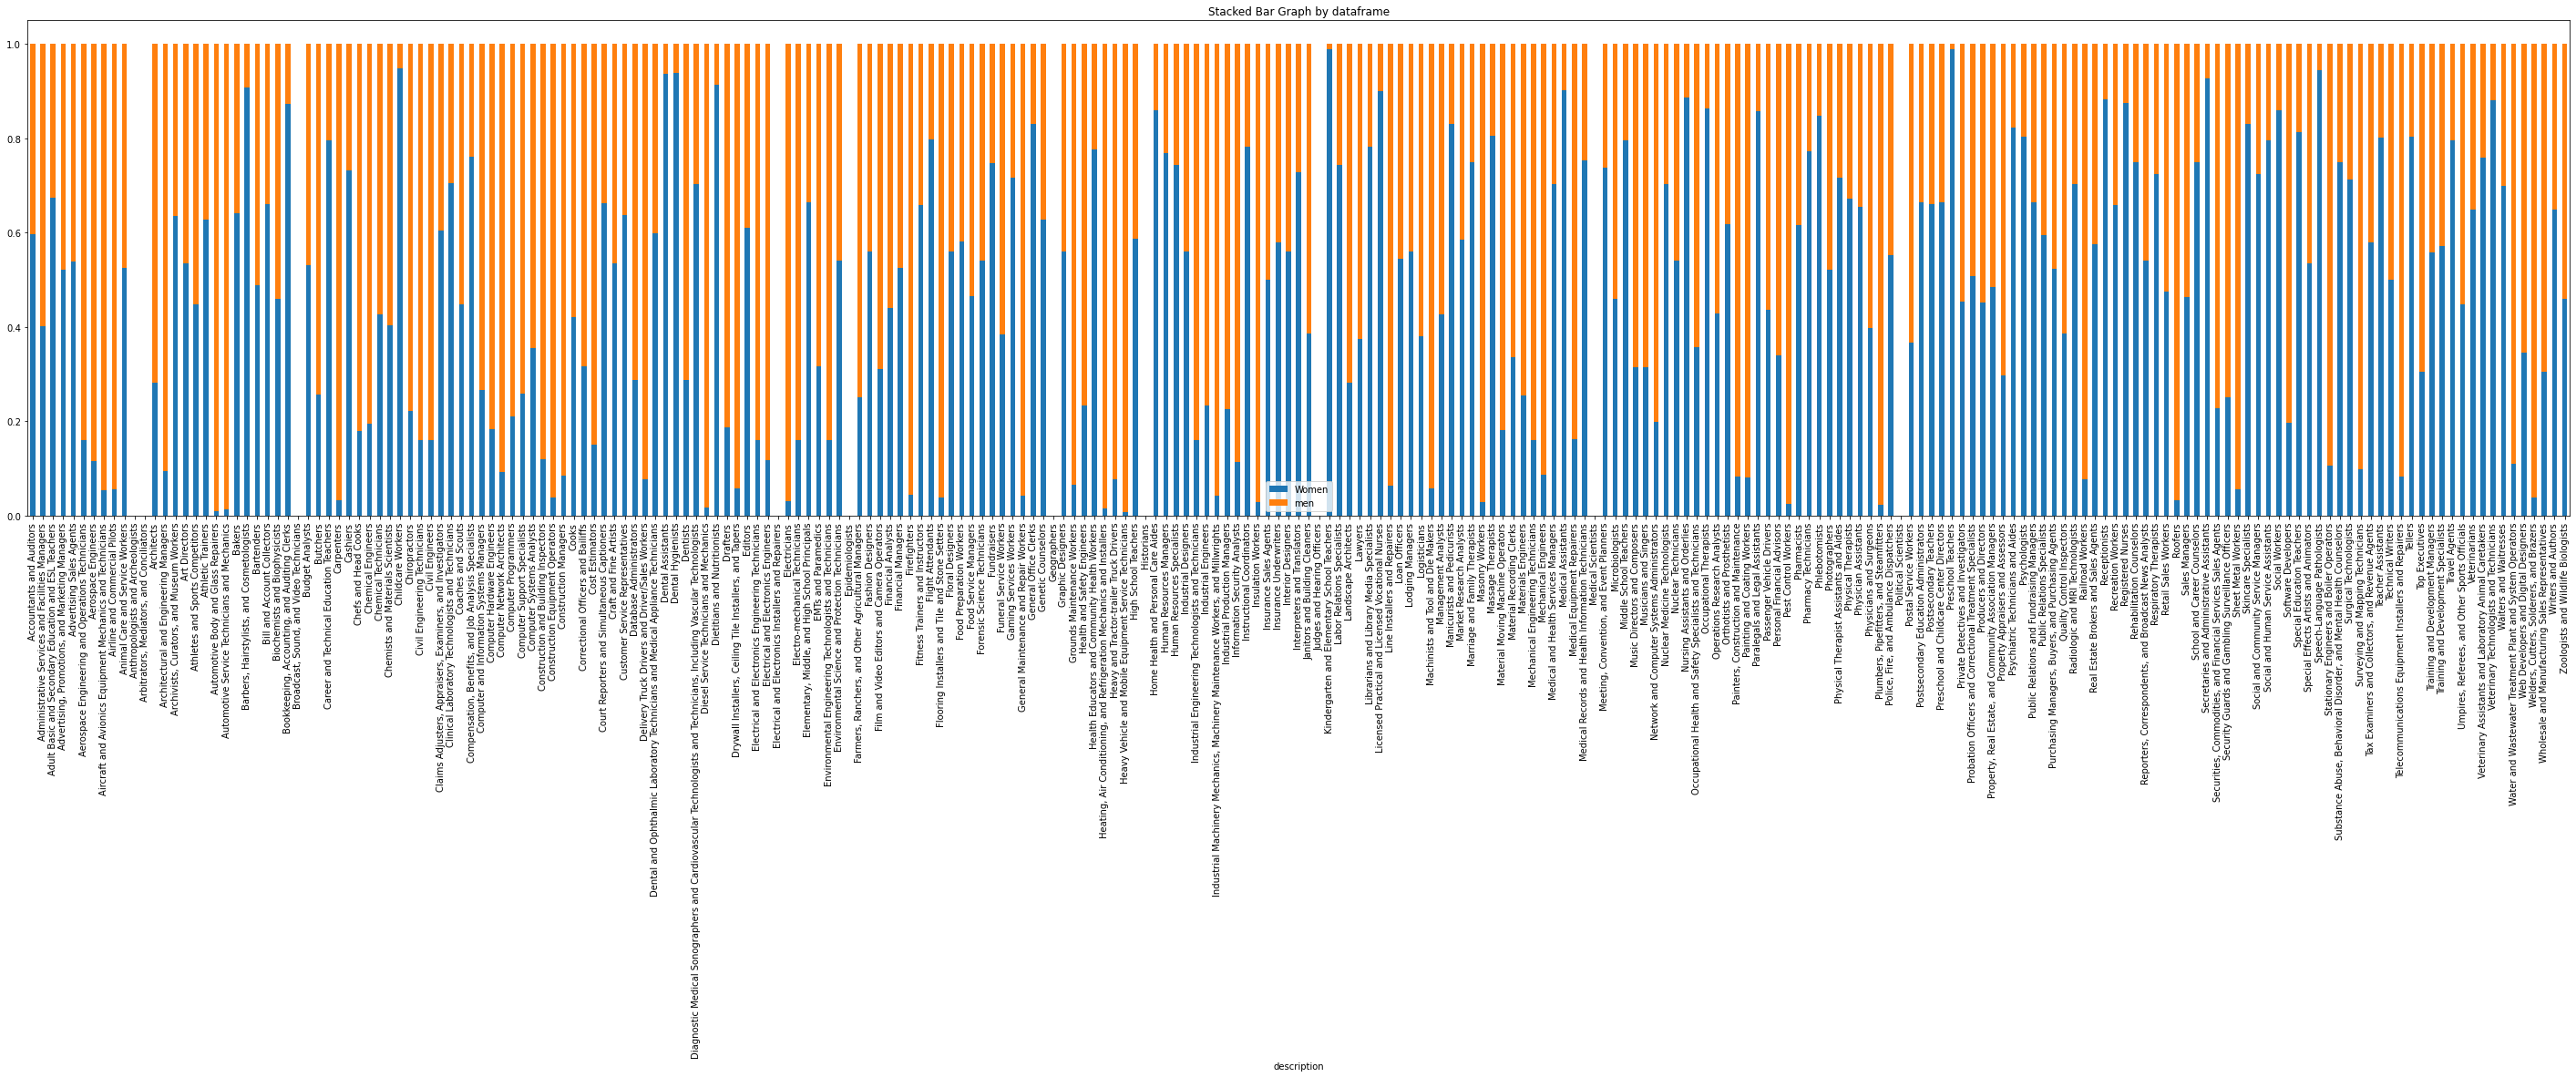

In [11]:
# stacked bar chart comparing women and men percentages for all the jobs
df4 = df_ooh[['description', 'Women']]
df4['men'] = 1 - df4['Women']

plt.rcParams["figure.figsize"] = (50, 10)
df4.plot(x='description', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
plt.show()

In [12]:
# create dataframe for extracting the top5 and bottom 5 records for each group
df5 = df[['description','Women', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino',
       '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']]
#df5.head()

In [13]:
# function to create a dataframe with top 5 and bottom 5 records for each demographic group
def selc_df(df, x=5):
    return df.head(x).append(df.tail(x))

lst = ['Women', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino', 
       '16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']

for item in lst:
    filename = item + '.csv'
    dfx = df5[['description', item]]
    dfz = dfx.sort_values(item)
    selc_df(dfz,5).to_csv(filename)